In [13]:
def prufer_to_adjacency_list(prufer):
    n = len(prufer) + 2

    # If the code is out of bounds, return a star graph
    if any(v < 1 or v > n for v in prufer):
        print("Invalid Prüfer code detected. Returning star graph.")
        center = 1
        return [[i for i in range(2, n + 1)]] + [[1] for _ in range(n - 1)]

    # Initialize degree of all vertices
    degree = [1] * n
    for v in prufer:
        degree[v - 1] += 1  # Convert to 0-indexed

    # Min-heap for leaves
    from heapq import heappush, heappop
    heap = []
    for v in range(n):
        if degree[v] == 1:
            heappush(heap, v)

    # Build adjacency list
    adjg = [[] for _ in range(n)]
    for v in prufer:
        leaf = heappop(heap)
        adjg[leaf].append(v - 1)
        adjg[v - 1].append(leaf)
        degree[leaf] -= 1
        degree[v - 1] -= 1
        if degree[v - 1] == 1:
            heappush(heap, v - 1)

    u = heappop(heap)
    v = heappop(heap)
    adjg[u].append(v)
    adjg[v].append(u)

    return adjg

def tree_from_prufer(prufer_code):
    adjg = prufer_to_adjacency_list(prufer_code)

    # Build graph
    G = Graph()
    for i, neighbors in enumerate(adjg):
        for neighbor in neighbors:
            if i < neighbor:  # Avoid duplicate edges
                G.add_edge(i + 1, neighbor + 1)  # Convert back to 1-indexed
    return G

def draw_tree_from_prufer(prufer_code):
    G = tree_from_prufer(prufer_code)
    # Print info
    print("Graph edges:")
    for edge in G.edges():
        print(f"  {edge[0]} -- {edge[1]}")
    print(f"\nNumber of vertices: {G.order()}")
    print(f"Number of edges: {G.size()}")
    print(f"Is tree: {G.is_tree()}")

    # Plot
    pos = G.layout('tree')
    p = plot(G, pos=pos, vertex_size=300, vertex_color='lightblue',
             edge_color='black', vertex_labels=True)
    p.show()


Graph edges:
  21 -- 32
  1 -- 21
  17 -- 31
  27 -- 31
  7 -- 31
  28 -- 31
  3 -- 24
  24 -- 30
  4 -- 9
  5 -- 23
  5 -- 20
  20 -- 28
  8 -- 20
  20 -- 29
  20 -- 30
  7 -- 16
  8 -- 25
  10 -- 17
  11 -- 13
  13 -- 32
  12 -- 14
  14 -- 32
  15 -- 22
  22 -- 32
  18 -- 30
  19 -- 29
  2 -- 31
  2 -- 6
  9 -- 20
  26 -- 27
  28 -- 32

Number of vertices: 32
Number of edges: 31
Is tree: True


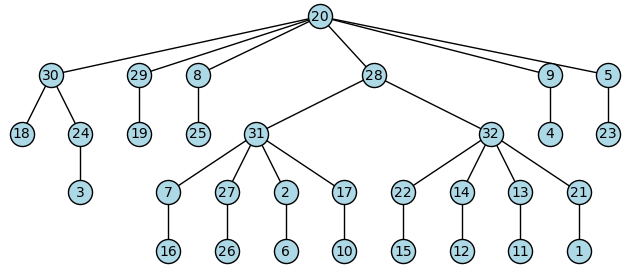

In [14]:
draw_tree_from_prufer([21,24,9,2,31,20,17,13,14,32,32,22,7,31,31,30,29,32,32,5,20,30,8,20,27,31,20,20,28,28])